![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Personalizando as Taxas de Acordo para cada Cliente</font>


![](https://media3.giphy.com/media/kd9i2msDiqiWY/giphy.gif)
![](https://www.pewresearch.org/wp-content/uploads/2013/12/incomeinequality.gif)


# Bancos e Cooperativas de Crédito
Essas são 2 de uma infinidade de empresas que oferecem vários tipos de contas e fornecem empréstimos com base nos requisitos de seus clientes. Corretoras da Bolsa ofertam diversos produtos como investimentos em mercado e os mais variados fundos de investimento. 


![](https://pro2-bar-s3-cdn-cf.myportfolio.com/175e3b73089ce78b4d03c0c413bb3c6d/bc08fcc6-17c9-4cc7-b233-c02ea464a44c_rw_1200.gif?h=4ef07270d0b94368f7dde1eb52046219)


Existem muitos bancos em todo o mundo que estão aproveitando o aprendizado de máquina e a IA em sua rotina diária e obtendo benefícios com isso. No Brasil e no Mundo as empresas estão usando o aprendizado de máquina para fornecer vários recursos aos clientes, bem como para prevenção e detecção de risco. Algumas aplicações incluem:

1. Suporte ao cliente

2. Detecção de fraude

3. Modelagem de Risco

4. Análise de marketing

5. Segmentação de clientes


![](https://gestaodeclinicas.ajmed.com.br/wp-content/uploads/2019/09/Taxa-trimestral-Uniprofissional.gif)

# Só que tem mais...


Você já se perguntou como os credores usam vários fatores, como pontuação de crédito, renda anual, valor do empréstimo aprovado, prazo de validade, relação dívida / renda, etc., e **selecionam suas taxas de juros?**

O processo, definido como 'precificação baseada em risco', usa um algoritmo sofisticado que alavanca diferentes fatores determinantes de um solicitante de empréstimo. 

A seleção de variáveis significativas ajudará a desenvolver um algoritmo de previsão que pode estimar as taxas de juros dos empréstimos com base nas informações dos clientes. 



#1° Problema de Negócio


Ajudar as empresas de crédito a obter uma **estimativa imediata da taxa de juros fixa** com base nas informações dos clientes. Esse é o <"**deal**">

Aqui, seu objetivo é usar um conjunto de dados de treinamento para **prever a categoria de taxa de empréstimo (1/2/3)** que será atribuída a cada empréstimo em nosso conjunto de teste.


#2° Análise Exploratória dos Dados


In [ ]:
!pip install catboost

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Versões dos pacotes usados neste jupyter notebook
!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

#Alertas
import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")



Author: Ciência dos Dados

numpy  : 1.19.5
IPython: 5.5.0
seaborn: 0.11.1
pandas : 1.1.5

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.10


###Fonte de Dados:

https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/ 

In [6]:
#Importar os Dados
df_train = pd.read_csv("train_fNxu4vz.csv")
df_test = pd.read_csv("test_fjtUOL8.csv")

In [21]:
df_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [9]:
df_train.shape

(164309, 14)

In [ ]:
df_test.head()

In [11]:
df_test.shape

(109541, 13)

In [12]:
#Descrição dos Campos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

### **Dicionário de Dados**

![](https://cienciadosdados.com/images/2021/adjuros.png)

In [13]:
#Estatística dos Campos
df_train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [ ]:
#Contagem de Domínios Distintos
df_train.nunique()

In [ ]:
#Verifica Valores Nulos
df_train.isna().sum()

In [ ]:
# #Estatística dos Campos
df_train['Length_Employed'].value_counts()

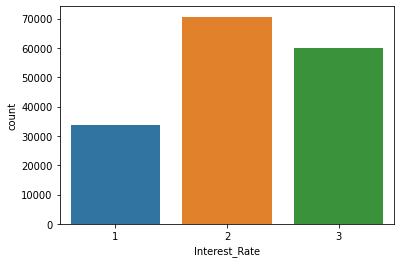

In [17]:
#Estatística dos Campos
df_train['Interest_Rate'].value_counts()
sns.countplot(df_train['Interest_Rate'])

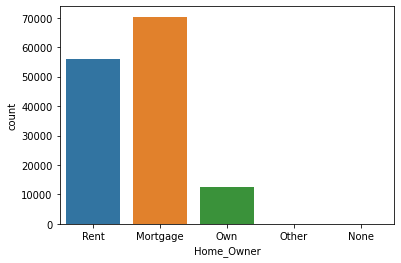

In [18]:
#Estatística dos Campos
df_train['Home_Owner'].value_counts()
sns.countplot(df_train['Home_Owner'])

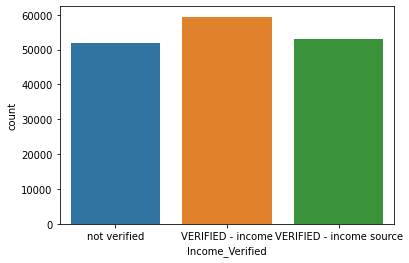

In [19]:
#Estatística dos Campos
df_train['Income_Verified'].value_counts()
sns.countplot(df_train['Income_Verified'])

In [ ]:
#Estatística dos Campos
df_train['Purpose_Of_Loan'].value_counts()


#3° Pré-Processamento dos Dados

In [22]:
# Convert to numeric
df_train["Loan_Amount_Requested"] = df_train["Loan_Amount_Requested"].str.replace(",", "")
df_train["Loan_Amount_Requested"] = pd.to_numeric(df_train["Loan_Amount_Requested"])
df_test["Loan_Amount_Requested"] = df_test["Loan_Amount_Requested"].str.replace(",", "")
df_test["Loan_Amount_Requested"] = pd.to_numeric(df_test["Loan_Amount_Requested"])


In [23]:
# Tratamento de Valores Missing e Nulos
df_train["Length_Employed"].fillna('NaN', inplace=True)
df_test["Length_Employed"].fillna('NaN', inplace=True)

df_train["Home_Owner"].fillna('NaN', inplace=True)
df_test["Home_Owner"].fillna('NaN', inplace=True)

df_train["Income_Verified"].fillna('NaN', inplace=True)
df_test["Income_Verified"].fillna('NaN', inplace=True)

df_train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
df_test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

df_train["Gender"].fillna('NaN', inplace=True)
df_test["Gender"].fillna('NaN', inplace=True)



In [24]:
# Drop loan ids - Eliminando campos de Identificação (campos sem utilidade, pois somente identificam o cliente)
df_train = df_train.drop(["Loan_ID"], axis=1)
loan_ids = df_test["Loan_ID"].values
df_test = df_test.drop(["Loan_ID"], axis=1)



### Imputação de Valores Missing 


In [25]:
# Imputação Pela Media -  mean
df_train["Annual_Income"].fillna(df_train["Annual_Income"].mean(), inplace=True)
df_test["Annual_Income"].fillna(df_test["Annual_Income"].mean(), inplace=True)

# Substituíndo nulos por Zero
df_train["Months_Since_Deliquency"].fillna(0, inplace=True)
df_test["Months_Since_Deliquency"].fillna(0, inplace=True)



### Criação de Variáveis - feature engineering

In [ ]:
# New feature
df_train["Number_Invalid_Acc"] = df_train["Total_Accounts"] - df_train["Number_Open_Accounts"]
df_test["Number_Invalid_Acc"] = df_test["Total_Accounts"] - df_test["Number_Open_Accounts"]

# New feature
df_train["Number_Years_To_Repay_Debt"] = df_train["Loan_Amount_Requested"]/df_train["Annual_Income"]
df_test["Number_Years_To_Repay_Debt"] = df_test["Loan_Amount_Requested"]/df_test["Annual_Income"]

df_train.head()

In [29]:
#Pré - Amostragem - Dados de Treino e Teste
X_train, Y = df_train.drop(["Interest_Rate"], axis=1).values, df_train["Interest_Rate"].values
X_test = df_test.values

X_train.shape, Y.shape, X_test.shape

((164309, 12), (164309,), (109541, 12))

In [28]:
Y

array([1, 3, 3, ..., 1, 3, 2])

#4° Construíndo a Máquina Preditiva 


### Validação Cruzada ou Cross Validation
https://youtu.be/HSRsFP-lW0Q

In [ ]:
from IPython.core.display import HTML
HTML('<<iframe width="380" height="200" src="https://www.youtube.com/embed/FI3RlY9AaVs" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

![](https://dadosdadosdados.files.wordpress.com/2018/06/copa2018_01.jpg?w=869)

In [31]:
# Validação Cruzada - Otimizando e Profissionalizando a Amostragem

kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()

for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    model = CatBoostClassifier(task_type="GPU", n_estimators=1000, max_depth=4, random_state=7, verbose=500)
    model.fit(x_train, y_train, cat_features=[1, 2, 4, 5, 11])
    
    #Avaliação no tempo de Treinamento
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

Learning rate set to 0.175594
0:	learn: 1.0809143	total: 12.3ms	remaining: 12.2s
500:	learn: 0.9052816	total: 4.36s	remaining: 4.34s
999:	learn: 0.8933738	total: 8.51s	remaining: 0us
0.5349985568689661
Learning rate set to 0.175594
0:	learn: 1.0808181	total: 8.88ms	remaining: 8.87s
500:	learn: 0.9038374	total: 3.92s	remaining: 3.91s
999:	learn: 0.8916711	total: 7.98s	remaining: 0us
0.5346382159205323
Learning rate set to 0.175594
0:	learn: 1.0812158	total: 9.35ms	remaining: 9.34s
500:	learn: 0.9049934	total: 3.95s	remaining: 3.94s
999:	learn: 0.8927167	total: 8.09s	remaining: 0us
0.533148672300574
Learning rate set to 0.175594
0:	learn: 1.0808484	total: 9.16ms	remaining: 9.15s
500:	learn: 0.9051933	total: 4.02s	remaining: 4s
999:	learn: 0.8925900	total: 8.25s	remaining: 0us
0.534585938864088
Learning rate set to 0.175594
0:	learn: 1.0809992	total: 9.63ms	remaining: 9.62s
500:	learn: 0.9049773	total: 4.14s	remaining: 4.13s
999:	learn: 0.8930004	total: 8.34s	remaining: 0us
0.537174330894

### Principais Variáveis

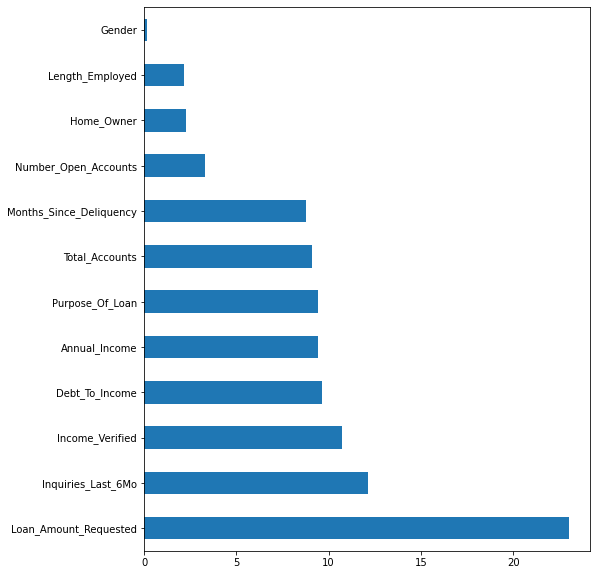

In [32]:
#Feature Importances
feat_imp = pd.Series(model.feature_importances_, index=df_train.drop(["Interest_Rate"], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

#5° Avaliação da Máquina Preditiva

In [ ]:
#preds = model.predict(x_test)
#score = f1_score(y_test, preds, average="weighted")
#scores.append(score)
#print(score)
#print("Average: ", sum(scores)/len(scores))



```
# Isto está formatado como código
```

# Entre os 20 Primeiros do Mundo na Competição!
https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/#LeaderBoard

![](https://cienciadosdados.com/images/2021/av.png)

# **Resumão**
![](https://i.pinimg.com/originals/55/01/60/5501609ee45d514d1f2c4a63502045e2.gif)

* Nesta aula, aprendemos a **Criar Máquina Preditiva** que prevê a Melhor Categoria de Taxa de juros para o Cliente
* Mais 1 Case com **Catboost**
* **Validação Cruzada**
* **Imputação** de Valores Missing
* Criação de Variáveis - **Feature Engineering**
* Ficamos entre os 20 primeiros colocados na competição




#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="202" src="https://www.youtube.com/embed/O8SZGlSFnwo" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')